In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sb
sb.set(style='white', color_codes=True)
sb.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\hp\\Documents\\DATA SCIENCE\\data_sets\\Titanic-Dataset.csv')

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.drop(['PassengerId','Name','Cabin','Ticket', 'Fare'], axis=1,inplace=True)

In [5]:
data.shape

(891, 7)

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [9]:
#we drop the rows with the remaining 2 missing values
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [12]:
#we get the dummy of the categorical variables
data_dummy=pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [13]:
data_dummy.head(2)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0


<AxesSubplot:>

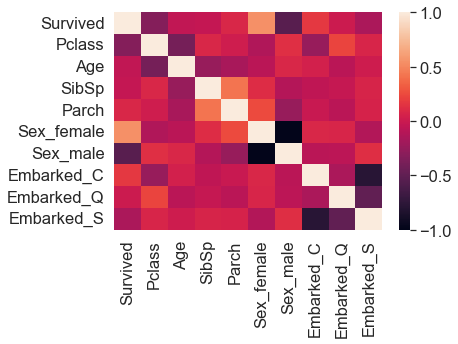

In [15]:
#find out if the variables are correlated using the heat map
plt.figure(figsize=(6,4))
sb.heatmap(data_dummy.corr())

In [18]:
features=['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
x=data_dummy[features]

In [19]:
x.shape

(889, 9)

In [20]:
y=data_dummy.Survived

In [21]:
y.shape

(889,)

In [22]:
#we create the train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=1)

In [23]:
logreg=LogisticRegression()

In [24]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
prediction=logreg.predict(xtest)

In [26]:
prediction

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [27]:
logreg.coef_

array([[-1.04314192, -0.03993457, -0.24324446, -0.04008103,  1.19387943,
        -1.19533661,  0.34944138, -0.03635018, -0.31454837]])

In [28]:
logreg.intercept_

array([3.66253934])

In [29]:
#compute the confusion matrix to evaluate the accuracy of classification
metrics.confusion_matrix(ytest,prediction)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [30]:
metrics.accuracy_score(ytest,prediction)   #the prediction is accurate at 83%

0.8314606741573034

In [31]:
len(xtest)

267

In [32]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [33]:
#we predict the probability of survival using the used features
logreg.predict_proba(xtest)

array([[0.26542844, 0.73457156],
       [0.39680939, 0.60319061],
       [0.94753068, 0.05246932],
       [0.25890075, 0.74109925],
       [0.94439334, 0.05560666],
       [0.1349627 , 0.8650373 ],
       [0.33322773, 0.66677227],
       [0.51998322, 0.48001678],
       [0.78159657, 0.21840343],
       [0.40753961, 0.59246039],
       [0.74018959, 0.25981041],
       [0.21122934, 0.78877066],
       [0.74870771, 0.25129229],
       [0.1456321 , 0.8543679 ],
       [0.86475191, 0.13524809],
       [0.36961142, 0.63038858],
       [0.89376644, 0.10623356],
       [0.29771474, 0.70228526],
       [0.1762542 , 0.8237458 ],
       [0.39841112, 0.60158888],
       [0.90505325, 0.09494675],
       [0.55279381, 0.44720619],
       [0.86461079, 0.13538921],
       [0.93775649, 0.06224351],
       [0.51586664, 0.48413336],
       [0.51627783, 0.48372217],
       [0.03900465, 0.96099535],
       [0.86935484, 0.13064516],
       [0.89829714, 0.10170286],
       [0.32470924, 0.67529076],
       [0.